In [1]:
from astropy.table import Table
from lens import Lens
from astropy.io import fits
import sqlutil as sqlutil 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

In [2]:
#candidates = Table.read('data/TGAShpmppmxl0150con.fits')

candidates = Table.read('candidates.txt',format='ascii')

#candidates = Table.read('data/table2')



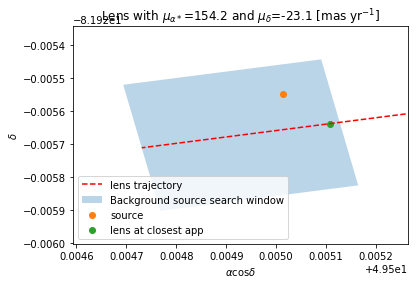

2013.57018477
0.000130186019338


In [3]:
TGASlensid = candidates['TGAS_id']
ppmxlid = candidates['ppmxl_id']
#TGASlensid = candidates['source_id']
#ppmxlid = candidates['ipix']

count = 0
Cand_TGASid = []
Cand_ppmxlid = []


for i in range(4,5):
    
    querystringTGAS = 'select ra, dec, source_id,pmra,pmdec,ref_epoch from gaia_dr1.tgas_source where source_id=' + str(TGASlensid[i])
    querystringPPMXL ='select ra, dec, id from ppmxl.main where id=' + str(ppmxlid[i])

    lensRa, lensDec, id,pmra,pmdec,ref_epoch = sqlutil.get(querystringTGAS,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')

    sourceRa, sourceDec,sourceId = sqlutil.get(querystringPPMXL,
                       db='wsdb',host='cappc127.ast.cam.ac.uk', user='peter_mcgill', password='Ln3g.wsk')
    
    testlens1 = Lens(id[0],lensRa[0],lensDec[0],pmra[0],pmdec[0],ref_epoch[0])
                     
                     
    if (testlens1.is_coord_in_box(sourceRa[0],sourceDec[0])):
        
        lensidstring = 'plots/' + str(id[0]) + '.png'
        
        pos1 = testlens1.get_eq_coords_at_epoch(2009.0)
        pos2 = testlens1.get_eq_coords_at_epoch(2025.0)
        
        box = np.transpose(testlens1.get_lens_box())
        boxjX = np.append(box[0],box[0][0])
        boxjY = np.append(box[1],box[1][0])
        
        timeCl = testlens1.get_time_of_closest_app(sourceRa[0],sourceDec[0])
        distance = testlens1.get_angular_separation_at_epoch(timeCl,sourceRa[0],sourceDec[0])
        
        posClose = testlens1.get_eq_coords_at_epoch(timeCl)
        
        plt.fill_between(boxjX,boxjY,alpha=0.3,label='Background source search window')
        plt.xlim(min(box[0]) - 0.0001,max(box[0]) + 0.0001)
        plt.ylim(min(box[1]) - 0.0001,max(box[1]) + 0.0001)
        plt.ylabel(r'$\delta$')
        plt.xlabel(r'$\alpha\cos\delta$')
        
        plt.title(r'Lens with $\mu_{\alpha *}$=%.1f and $\mu_{\delta}$=%.1f [mas yr$^{-1}$]'%(pmra[0],pmdec[0]))
        plt.scatter(sourceRa[0]*np.cos(np.deg2rad(sourceDec[0])),sourceDec[0],label='source')
        plt.plot([pos1[0],pos2[0]],[pos1[1],pos2[1]],'r--',label='lens trajectory')
        plt.scatter(posClose[0],posClose[1],label='lens at closest app')
        
        plt.legend()
        
        plt.show()
        
        print(timeCl)
        print(distance)
        
        #plt.savefig(lensidstring)
        #plt.clf()
        

#data = Table({'TGAS_id' : Cand_TGASid, 'ppmxl_id' : Cand_ppmxlid},names=['TGAS_id','ppmxl_id'])
#ascii.write(data,'largpmcandidates.txt')

In [15]:
8.11757724979e-05

9.55841820241e-09
-78.1644242328


2015.0


In [6]:
testlens1.is_coord_in_box(sourceRa[0],sourceDec[0])

True

-8.87981768714


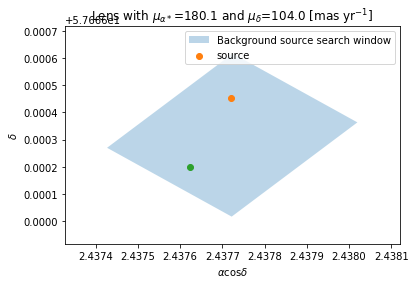

2.43772004998 57.666452
4.557788


In [7]:
box = np.transpose(testlens1.get_lens_box())
    
pos = testlens1.get_eq_coords_at_epoch(20.0)

#print(pos)
#print(testlens1.get_eq_coords(lensRa[0],lensDec[0]))
#plt.scatter(pos[0],pos[1],label='lens')
#plt.scatter(box[0],box[1])

boxjX = np.append(box[0],box[0][0])
boxjY = np.append(box[1],box[1][0])

plt.fill_between(boxjX,boxjY,alpha=0.3,label='Background source search window')
plt.xlim(min(box[0]) - 0.0001,max(box[0]) + 0.0001)
plt.ylim(min(box[1]) - 0.0001,max(box[1]) + 0.0001)
plt.ylabel(r'$\delta$')
plt.xlabel(r'$\alpha\cos\delta$')

plt.title(r'Lens with $\mu_{\alpha *}$=%.1f and $\mu_{\delta}$=%.1f [mas yr$^{-1}$]'%(pmra[0],pmdec[0]))
print(sourceDec[0]*np.cos(sourceRa[0]))
#plt.scatter(pos[0],pos[1])
plt.scatter(sourceRa[0]*np.cos(np.deg2rad(sourceDec[0])),sourceDec[0],label='source')
plt.scatter(lensRa[0]*np.cos(np.deg2rad(lensDec[0])),lensDec[0])
plt.legend()
plt.show()

print(sourceRa[0]*np.cos(np.deg2rad(sourceDec[0])),sourceDec[0])

print(sourceRa[0])

In [8]:
print(sourceRa[0]*np.cos(np.deg2rad(sourceDec[0])),sourceDec[0])

2.43772004998 57.666452


In [9]:
print(lensDec[0]*np.cos(lensRa[0]),lensDec[0])

-8.89178371033 57.6662009974
